In [1]:
import numpy
import tensorflow
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data() 

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

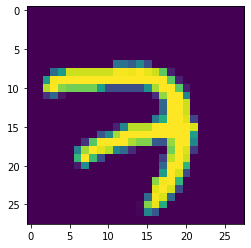

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5000])

In [9]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [10]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(number_of_classes,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 151s 80ms/step - loss: 0.2453 - accuracy: 0.9517 - val_loss: 0.1123 - val_accuracy: 0.9650
Epoch 2/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0872 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.0846 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0995 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 149s 79ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.1209 - val_accuracy: 0.9744


In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print(metrics)

[0.12087427079677582, 0.974399983882904]


In [19]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 180ms/step
[[1.9971620e-12 4.7357035e-16 8.7858124e-12 2.3796256e-06 1.2781986e-04
  1.3130861e-07 3.2203012e-18 5.9429000e-05 8.2135877e-08 9.9981016e-01]]


In [20]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images
np.argmax(y_test[5000:5001])

[9]


3

In [21]:
model.save('models/Project.h5')

In [22]:
from tensorflow.keras.models import load_model
model=load_model("C:/Users/Admin/models/mnistCNN.h5")
from PIL import Image
import numpy as np
for index in range(4):
    img=Image.open('Ds5Rc.png' ).convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 113ms/step
[[7.9243921e-04 8.2655414e-04 8.5867159e-06 7.2275728e-01 7.5225602e-03
  2.4705124e-01 1.1689115e-02 3.1455650e-04 8.9231674e-03 1.1454164e-04]]
1/1 [==============================] - 0s 43ms/step
[[7.9243921e-04 8.2655414e-04 8.5867159e-06 7.2275728e-01 7.5225602e-03
  2.4705124e-01 1.1689115e-02 3.1455650e-04 8.9231674e-03 1.1454164e-04]]
1/1 [==============================] - 0s 41ms/step
[[7.9243921e-04 8.2655414e-04 8.5867159e-06 7.2275728e-01 7.5225602e-03
  2.4705124e-01 1.1689115e-02 3.1455650e-04 8.9231674e-03 1.1454164e-04]]
1/1 [==============================] - 0s 52ms/step
[[7.9243921e-04 8.2655414e-04 8.5867159e-06 7.2275728e-01 7.5225602e-03
  2.4705124e-01 1.1689115e-02 3.1455650e-04 8.9231674e-03 1.1454164e-04]]


In [23]:
print(np.argmax(y_pred, axis=1))

[3]
